In [2]:
import pandas as pd
import numpy as np
import S2_0_Loading_Data
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
data = S2_0_Loading_Data.load_data(get_main_df=True)
data.head()

,label,xmin,ymin,xmax,ymax,height,width,path
0,without_mask,79,105,109,142,366,512,./images/maksssksksss0.png
1,with_mask,185,100,226,144,366,512,./images/maksssksksss0.png
2,without_mask,325,90,360,141,366,512,./images/maksssksksss0.png
3,with_mask,321,34,354,69,156,400,./images/maksssksksss1.png
4,with_mask,224,38,261,73,156,400,./images/maksssksksss1.png


### Images in our dataset can have one or multiple faces. For Example:

(226, 400, 3)


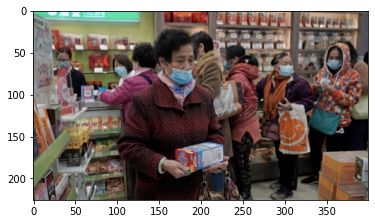

In [4]:
path1 = os.path.join(os.getcwd(), "images", "maksssksksss737.png")
image = cv2.imread(path1)
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### The dataset contains all the relevant information we need in annotaion files.

We can build a table that illustrates how out processed data is structured, with each row being a face.


In [5]:
image_737_data = data[data['path'] == "./images/maksssksksss737.png"]
image_737_data

,label,xmin,ymin,xmax,ymax,height,width,path
3448,with_mask,28,55,46,71,226,400,./images/maksssksksss737.png
3449,with_mask,98,62,111,78,226,400,./images/maksssksksss737.png
3450,mask_weared_incorrect,159,50,193,90,226,400,./images/maksssksksss737.png
3451,with_mask,293,59,313,80,226,400,./images/maksssksksss737.png
3452,with_mask,352,51,372,72,226,400,./images/maksssksksss737.png
3453,with_mask,228,53,241,73,226,400,./images/maksssksksss737.png


### We can use our processed data to crop multiple faces and identify labels

In [6]:
image_737 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
for i in range(len(image_737_data)):
    data_person = image_737_data.iloc[i]
    text = data_person['label']
    if text == 'with_mask':
        color = (0, 255, 0)
        label = 'Correct'
    elif text == 'mask_weared_incorrect':
        color = (255, 255, 0)
        label = 'Incorrect'
    else:
        color = (255, 0, 0) # red
        label = 'No Mask'
    corner_1 = (data_person['xmin'], data_person['ymin'])
    corner_2 = (data_person['xmax'], data_person['ymax'])
    print(corner_1)
    cv2.rectangle(image_737, corner_1, corner_2, color = color, thickness = 1)
    org = (int((data_person['xmin']+data_person['xmax'])/2 -12), int((data_person['ymin']+data_person['ymax'])/2))
    cv2.putText(image_737,org = org,text = label, fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale = 0.4,thickness = 1,color = color)

(28, 55)
(98, 62)
(159, 50)
(293, 59)
(352, 51)
(228, 53)


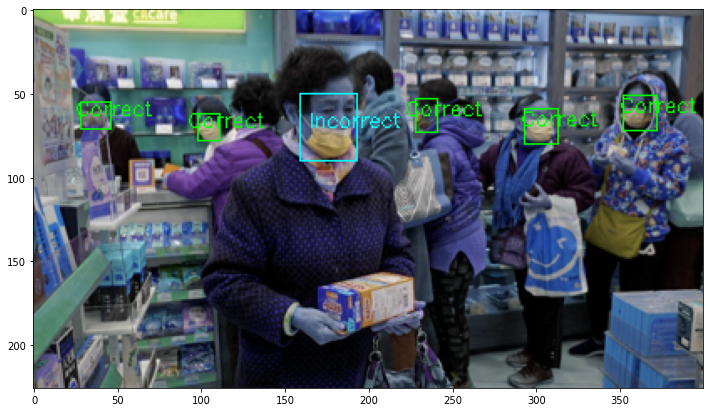

In [7]:
plt.figure(figsize = (12, 8))
plt.imshow(cv2.cvtColor(image_737, cv2.COLOR_BGR2RGB))
plt.show()

### There are 3 unique labels

In [8]:
# unique labels
items = data['label'].unique().tolist()
items

['without_mask', 'with_mask', 'mask_weared_incorrect']

### Most people are wearing their masks, some are not wearing masks, and very few are wearing their masks incorrectly.

In [9]:
# distribution for each labels
size_WM = data[data.label == 'with_mask'].shape[0] / data.shape[0] # with mask
size_MWI = data[data.label == 'mask_weared_incorrect'].shape[0] / data.shape[0] # mask_weared_incorrect
size_WithoutM = data[data.label == 'without_mask'].shape[0] / data.shape[0] # without_mask
sizes = [size_WM, size_MWI, size_WithoutM]
sizes

[0.793713163064833, 0.030206286836935166, 0.17608055009823181]

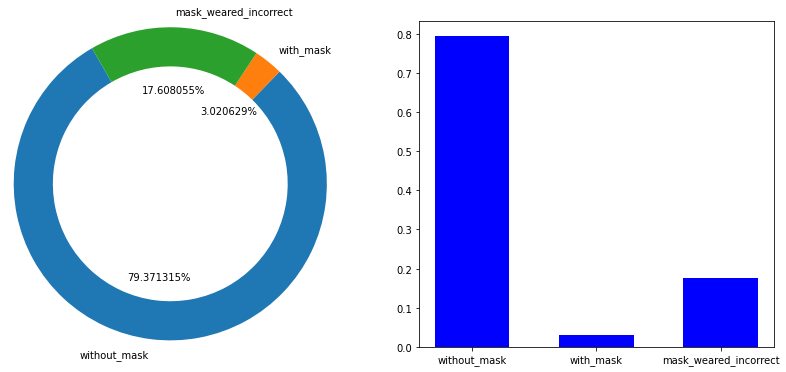

In [10]:
# visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
ax1.pie(sizes,wedgeprops=dict(width=0.3) ,
        labels=items, radius=1.2, startangle = 120, autopct='%1f%%')

ax2 = plt.bar(items, list(sizes),
              color ='blue',width = 0.6)

plt.show()

### We need to gather statistics on how big each face is

As you can see below, each face is tupically around 25x25 pixels.

When we crop our faces, we should scale them to roughly this size to minimize the amount of scaling we do
while not losing too much information

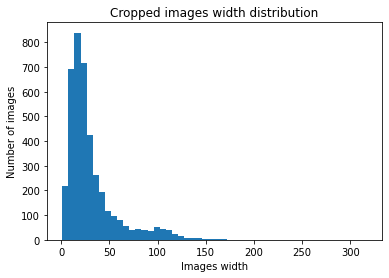

In [11]:
plt.hist(data["xmax"] - data["xmin"], bins = 50)
plt.title('Cropped images width distribution')
plt.ylabel('Number of images')
plt.xlabel('Images width')
plt.show()

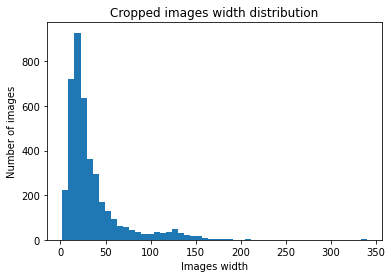

In [12]:
plt.hist(data["ymax"] - data["ymin"], bins = 50)
plt.title('Cropped images width distribution')
plt.ylabel('Number of images')
plt.xlabel('Images width')
plt.show()